# Importing Necessary Libraries

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
#reading csv file
df=pd.read_csv("Iris.csv")
df.head(100)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


In [84]:
df.shape #to get idea of size of data set

(150, 6)

In [85]:
X=df.iloc[:,[1,2,3,4]].values

## **Handling Missing Values**

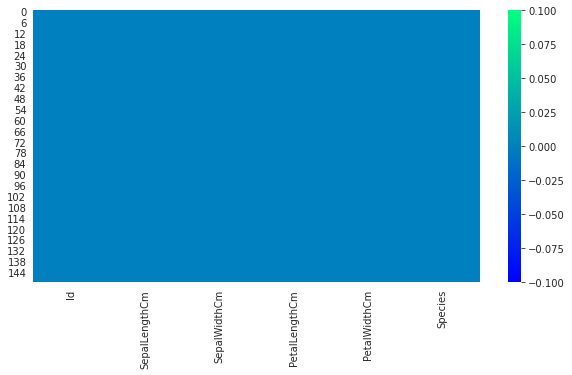

In [86]:
#Using heatmap to see if there is any missing value in data set or not 
plt.figure(figsize=(10,5))
a=df.isnull()
sns.heatmap(a,cmap="winter")

# **Using Elbow Method to find optimal Number of clusters**

In [87]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

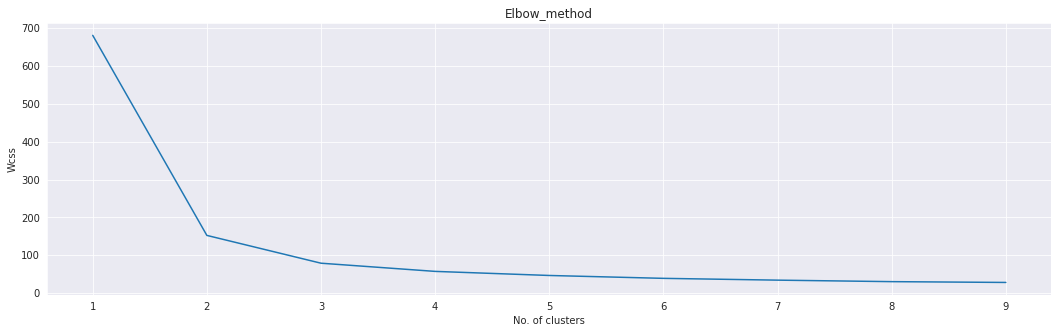

In [88]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,5))
plt.plot(range(1, 10), wcss)
plt.title('Elbow_method')
plt.xlabel('No. of clusters')
plt.ylabel('Wcss') 
plt.show()

In [89]:
#We can see that optimal number of clusters using elbow method is 3. 

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 10)
ykmeans = kmeans.fit_predict(X)

In [90]:
print(ykmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


# **Visualization**

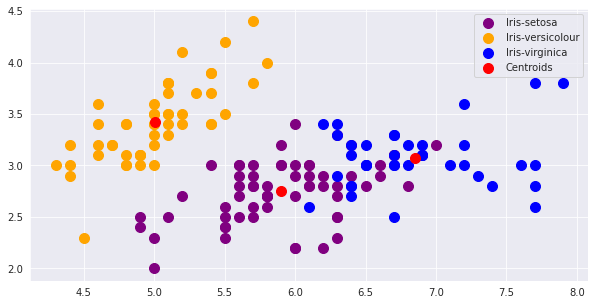

In [91]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
plt.scatter(X[ykmeans == 0, 0], X[ykmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(X[ykmeans == 1, 0], X[ykmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[ykmeans == 2, 0], X[ykmeans == 2, 1], s = 100, c = 'blue', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
#Cetroid centres with red
plt.legend()